In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x=df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [5]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

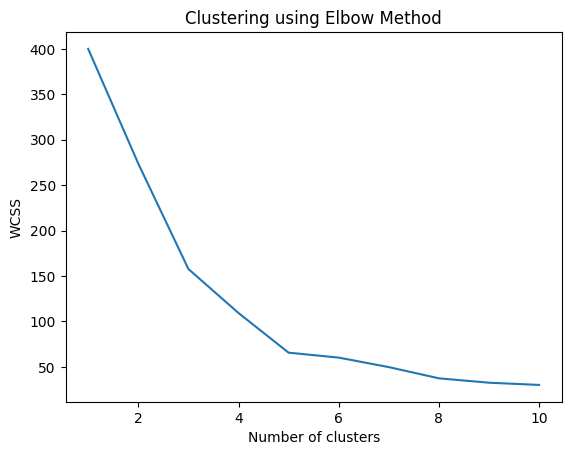

In [6]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Clustering using Elbow Method")
plt.show()

In [7]:
kmeans=KMeans(n_clusters=5,random_state=42)
df['Cluster']=kmeans.fit_predict(x_scaled)

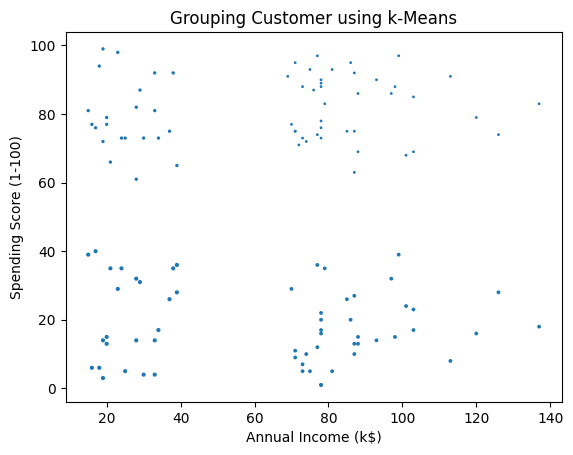

In [10]:
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            df['Cluster'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Grouping Customer using k-Means")
plt.show()